In [4]:
# IMPORTS and LIBRARIES

from __future__ import annotations
from typing import Optional

import requests
import bs4
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
from matplotlib.colors import BoundaryNorm, ListedColormap
import mpl_toolkits.axes_grid1
import operator
from datetime import date
import matplotlib.pyplot as plt
import random

In [5]:
# HELPER FUNCTIONS

def time_convert(s: String) -> String:
    """
    A function which converts parameter s, a string representation of a 12-hour date format,
    into the standard 24-hour date format.
    
    >>> time_convert("12:45 AM")
    '0:45'
    """

    if s[-2:] == "AM":
        if s[:2] == "12":
            s = "0" + s[-6:-3]
        else:
            s = s[:-3]
    if s[-2:] == "PM":
        if s[:2] == "12":
            s = "12" + s[-6:-3]
        else:
            s = str((int(s[:-6]) + 12)) + s[-6:-3]
    return s

In [8]:
# DICTIONARY CONSTANTS

monthDict = {"January":31, "February":28, "March":31, "April":30, "May":31, "June":30, "July":31, "August":31, "September":30, "October":31, "November":30, "December":31}

monthList = {"January":1, "February":2, "March":3, "April":4, "May":5, "June":6, "July":7, "August":8, "September":9, "October":10, "November":11, "December":12}

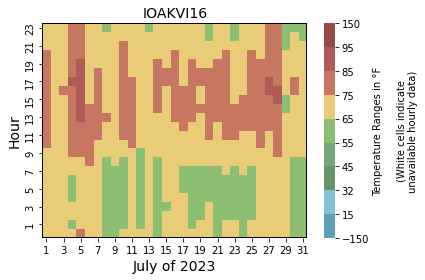

In [10]:
# MAIN

masterList = []

yearResult = date.today().year
monthResult = date.today().month
dayResult = date.today().day

station = 'IOAKVI16'
year = 2023
month = "July"

day = 1
while day <= monthDict[month]:
    try:
        if year == yearResult and monthList[month] == monthResult and day == dayResult+1:
            break   
        if year == yearResult and monthList[month] > monthResult:
            raise ValueError(f'Data for {month} of {year} does not exist yet')
        res = 'https://www.wunderground.com/dashboard/pws/{}/table/{}-{}-{}/{}-{}-{}/daily'
        scrappedUrl = res.format(station,year,monthList[month],day,year,monthList[month],day)
        result = requests.get(scrappedUrl)
        soup = bs4.BeautifulSoup(result.text, "lxml")

        timeList = [item.text for item in soup.select('td')[24:305]]

        newList = [i for i in soup.select(".test-true.wu-unit.wu-unit-temperature.is-degree-visible.ng-star-inserted")[9:567:2]]
        dayList = [day for i in soup.select(".test-true.wu-unit.wu-unit-temperature.is-degree-visible.ng-star-inserted")[9:567:2]]

        tempList = []
        for i in newList:
            temperature = i.getText()
            tempVal = temperature[:-3]
            tempList.append((float(tempVal)))

        timeandtemp = tuple(zip(dayList,timeList,tempList))
        df = pd.DataFrame([(dayList,timeList, tempList) for dayList,timeList,tempList in zip(dayList,timeList, tempList)],columns=['Day','Time','Temperature'])
        
        df['Time'] = df['Time'].map(time_convert)

        df[['Hour','Minutes']] = df['Time'].str.split(':', expand=True)

        df['Hour'] = df['Hour'].astype(int)

        new_df = df.groupby(["Day","Hour"])['Temperature'].mean().reset_index()

        masterList.append(new_df)

        master_df = pd.concat(masterList)
        
        day += 1
        
    except ValueError:
        
        timeList = ['12:04 AM', '12:09 AM', '12:14 AM', '12:18 AM', '12:24 AM', '12:29 AM', '12:34 AM', '12:39 AM', '12:44 AM', '12:49 AM', '12:54 AM', '12:59 AM', '1:04 AM', '1:09 AM', '1:14 AM', '1:19 AM', '1:24 AM', '1:29 AM', '1:34 AM', '1:39 AM', '1:44 AM', '1:48 AM', '1:54 AM', '1:59 AM', '2:04 AM', '2:09 AM', '2:14 AM', '2:19 AM', '2:24 AM', '2:29 AM', '2:34 AM', '2:39 AM', '2:44 AM', '2:49 AM', '2:54 AM', '2:59 AM', '3:04 AM', '3:09 AM', '3:14 AM', '3:19 AM', '3:24 AM', '3:29 AM', '3:34 AM', '3:39 AM', '3:44 AM', '3:49 AM', '3:54 AM', '3:59 AM', '4:04 AM', '4:09 AM', '4:14 AM', '4:19 AM', '4:24 AM', '4:29 AM', '4:34 AM', '4:39 AM', '4:44 AM', '4:49 AM', '4:54 AM', '4:55 AM', '5:04 AM', '5:09 AM', '5:14 AM', '5:19 AM', '5:23 AM', '5:29 AM', '5:33 AM', '5:39 AM', '5:44 AM', '5:49 AM', '5:54 AM', '5:59 AM', '6:02 AM', '6:09 AM', '6:14 AM', '6:19 AM', '6:24 AM', '6:29 AM', '6:34 AM', '6:39 AM', '6:44 AM', '6:49 AM', '6:54 AM', '6:59 AM', '7:04 AM', '7:09 AM', '7:14 AM', '7:19 AM', '7:24 AM', '7:29 AM', '7:34 AM', '7:39 AM', '7:44 AM', '7:49 AM', '7:54 AM', '7:59 AM', '8:04 AM', '8:09 AM', '8:14 AM', '8:19 AM', '8:24 AM', '8:27 AM', '8:32 AM', '8:39 AM', '8:44 AM', '8:49 AM', '8:54 AM', '8:59 AM', '9:04 AM', '9:09 AM', '9:14 AM', '9:19 AM', '9:24 AM', '9:29 AM', '9:34 AM', '9:39 AM', '9:44 AM', '9:49 AM', '9:54 AM', '9:59 AM', '10:04 AM', '10:09 AM', '10:14 AM', '10:19 AM', '10:24 AM', '10:29 AM', '10:34 AM', '10:38 AM', '10:44 AM', '10:49 AM', '10:54 AM', '10:59 AM', '11:04 AM', '11:09 AM', '11:14 AM', '11:19 AM', '11:24 AM', '11:29 AM', '11:34 AM', '11:39 AM', '11:44 AM', '11:49 AM', '11:54 AM', '11:59 AM', '12:04 PM', '12:09 PM', '12:14 PM', '12:19 PM', '12:24 PM', '12:29 PM', '12:34 PM', '12:39 PM', '12:44 PM', '12:49 PM', '12:54 PM', '12:59 PM', '1:04 PM', '1:09 PM', '1:14 PM', '1:19 PM', '1:24 PM', '1:29 PM', '1:31 PM', '1:39 PM', '1:44 PM', '1:49 PM', '1:54 PM', '1:59 PM', '2:04 PM', '2:09 PM', '2:14 PM', '2:19 PM', '2:24 PM', '2:29 PM', '2:34 PM', '2:39 PM', '2:44 PM', '2:49 PM', '2:54 PM', '2:59 PM', '3:04 PM', '3:09 PM', '3:14 PM', '3:19 PM', '3:24 PM', '3:29 PM', '3:34 PM', '3:39 PM', '3:44 PM', '3:47 PM', '3:54 PM', '3:59 PM', '4:04 PM', '4:09 PM', '4:14 PM', '4:19 PM', '4:24 PM', '4:29 PM', '4:34 PM', '4:39 PM', '4:44 PM', '4:49 PM', '4:54 PM', '4:59 PM', '5:04 PM', '5:09 PM', '5:14 PM', '5:19 PM', '5:24 PM', '5:29 PM', '5:34 PM', '5:39 PM', '5:44 PM', '5:49 PM', '5:54 PM', '5:59 PM', '6:04 PM', '6:09 PM', '6:14 PM', '6:19 PM', '6:24 PM', '6:29 PM', '6:34 PM', '6:39 PM', '6:44 PM', '6:49 PM', '6:54 PM', '6:59 PM', '7:04 PM', '7:09 PM', '7:14 PM', '7:19 PM', '7:24 PM', '7:29 PM', '7:34 PM', '7:39 PM', '7:44 PM', '7:49 PM', '7:54 PM', '7:59 PM', '8:04 PM', '8:09 PM', '8:13 PM', '8:19 PM', '8:24 PM', '8:29 PM', '8:34 PM', '8:39 PM', '8:44 PM', '8:49 PM', '8:54 PM', '8:59 PM', '9:04 PM', '9:09 PM', '9:14 PM', '9:19 PM', '9:24 PM', '9:29 PM', '9:34 PM', '9:39 PM', '9:44 PM', '9:49 PM', '9:54 PM', '9:59 PM', '10:04 PM', '10:09 PM', '10:14 PM', '10:19 PM', '10:24 PM', '10:29 PM', '10:34 PM', '10:39 PM', '10:44 PM', '10:49 PM', '10:54 PM', '10:59 PM', '11:04 PM', '11:09 PM', '11:14 PM', '11:19 PM', '11:24 PM']

        dayList = [day for i in timeList]
        tempList = [200 for i in timeList]

        timeandtemp = tuple(zip(dayList,timeList,tempList))

        df = pd.DataFrame([(dayList,timeList, tempList) for dayList,timeList,tempList in zip(dayList,timeList, tempList)],columns=['Day','Time','Temperature'])

        df['Time'] = df['Time'].map(time_convert)

        df[['Hour','Minutes']] = df['Time'].str.split(':', expand=True)

        df['Hour'] = df['Hour'].astype(int)

        new_df = df.groupby(["Day","Hour"])['Temperature'].mean().reset_index()
        
        if new_df['Temperature'][0] == 200:
            new_df['Temperature'] = 'NaN'
        else:
            pass
        
        masterList.append(new_df)

        master_df = pd.concat(masterList)
        
        day += 1
        
heatmap_data = pd.pivot_table(master_df, values='Temperature', index=['Hour'], columns='Day',dropna = False)
heatmap_data.sort_index(level=0, ascending=False, inplace=True)

colors = ["#5ca0b4","#83c2d5","#679568","#75a878","#8dbf72","#e9cc78","#c77661","#b05b5a","#984b44"]
bounds = [-150,15,32,45,55,65,75,85,95,150]
my_cmap = ListedColormap(colors)
my_norm = BoundaryNorm(bounds, ncolors = len(colors))

res = sns.heatmap(heatmap_data, cmap = my_cmap, norm = my_norm, cbar = True, cbar_kws={'label': 'Temperature Ranges in °F\n\n(White cells indicate\nunavailable hourly data)'})

plt.xlabel(f'{month} of {year}',size=14)
plt.xticks(rotation = 0)
plt.ylabel("Hour",size=14)
plt.title(f'{station}', size=14)

res.axhline(y = 0, color = 'k', 
            linewidth = 2)
res.axhline(y = 24, color = 'k',
            linewidth = 2)
res.axvline(x = 0, color = 'k',
            linewidth = 2)
if year == yearResult and monthList[month] == monthResult and day == dayResult+1:
    n = dayResult
else:
    n = monthDict[month]
res.axvline(x = n, color = 'k',
            linewidth = 2)

plt.tight_layout()